<a href="https://colab.research.google.com/github/marcosrbenso/ClimateImpactML/blob/main/CAM_413_Atividade_pr%C3%A1tica_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> **R Colab Notebook - Atividade prática 1**



📘 **Tópicos Especiais em Análise Ambiental**

Objetivo da Aula

Este notebook tem como objetivo introduzir os alunos ao uso do Google Colab para análise exploratória de dados e construção de um modelo de classificação utilizando o pacote Caret em R. Ao final da aula, os alunos deverão estar familiarizados com os seguintes conceitos e práticas:

Como utilizar o Google Colab para rodar scripts em R.

Carregar e explorar conjuntos de dados.

Aplicar técnicas de análise exploratória de dados.

Construir um modelo de classificação utilizando Caret.




# 1. Executando R no Google Colab

O Google Colab suporta Python por padrão, mas é possível rodar R alterando a linguagem da célula.

In [ ]:
# Verifique se o R está ativado no ambiente do Colab
R.Version()

$platform
[1] "x86_64-pc-linux-gnu"

$arch
[1] "x86_64"

$os
[1] "linux-gnu"

$system
[1] "x86_64, linux-gnu"

$status
[1] ""

$major
[1] "4"

$minor
[1] "4.2"

$year
[1] "2024"

$month
[1] "10"

$day
[1] "31"

$`svn rev`
[1] "87279"

$language
[1] "R"

$version.string
[1] "R version 4.4.2 (2024-10-31)"

$nickname
[1] "Pile of Leaves"

# 2. Carregando os pacotes e os dados

In [ ]:
# Instalando e Carregando os Pacotes Necessários
install.packages("caret")
install.packages("randomForest")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Carregamento de Dados
# https://bioone.org/ContentImages/Journals/wbio/21/5/wlb.00105/graphic/t01_254.gif
data(scat)
str(scat)

'data.frame':	110 obs. of  19 variables:
 $ Species  : Factor w/ 3 levels "bobcat","coyote",..: 2 2 1 2 2 2 1 1 1 1 ...
 $ Month    : Factor w/ 9 levels "April","August",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Year     : int  2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 ...
 $ Site     : Factor w/ 2 levels "ANNU","YOLA": 2 2 2 2 2 2 1 1 1 1 ...
 $ Location : Factor w/ 3 levels "edge","middle",..: 1 1 2 2 1 1 3 3 3 2 ...
 $ Age      : int  5 3 3 5 5 5 1 3 5 5 ...
 $ Number   : int  2 2 2 2 4 3 5 7 2 1 ...
 $ Length   : num  9.5 14 9 8.5 8 9 6 5.5 11 20.5 ...
 $ Diameter : num  25.7 25.4 18.8 18.1 20.7 21.2 15.7 21.9 17.5 18 ...
 $ Taper    : num  41.9 37.1 16.5 24.7 20.1 28.5 8.2 19.3 29.1 21.4 ...
 $ TI       : num  1.63 1.46 0.88 1.36 0.97 1.34 0.52 0.88 1.66 1.19 ...
 $ Mass     : num  15.9 17.6 8.4 7.4 25.4 ...
 $ d13C     : num  -26.9 -29.6 -28.7 -20.1 -23.2 ...
 $ d15N     : num  6.94 9.87 8.52 5.79 7.01 8.28 4.2 3.89 7.34 6.06 ...
 $ CN       : num  8.5 11.3 8.1 11.5 10.6 9 5.4 5.6 5

# 3. Análise exploratória dos dados

In [ ]:
#  Análise Exploratória de Dados (EDA)
str(scat) # Estrutura dos dados
dim(scat) # Dimensões do conjunto de dados
summary(scat) # Estatísticas descritivas

'data.frame':	110 obs. of  19 variables:
 $ Species  : Factor w/ 3 levels "bobcat","coyote",..: 2 2 1 2 2 2 1 1 1 1 ...
 $ Month    : Factor w/ 9 levels "April","August",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Year     : int  2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 ...
 $ Site     : Factor w/ 2 levels "ANNU","YOLA": 2 2 2 2 2 2 1 1 1 1 ...
 $ Location : Factor w/ 3 levels "edge","middle",..: 1 1 2 2 1 1 3 3 3 2 ...
 $ Age      : int  5 3 3 5 5 5 1 3 5 5 ...
 $ Number   : int  2 2 2 2 4 3 5 7 2 1 ...
 $ Length   : num  9.5 14 9 8.5 8 9 6 5.5 11 20.5 ...
 $ Diameter : num  25.7 25.4 18.8 18.1 20.7 21.2 15.7 21.9 17.5 18 ...
 $ Taper    : num  41.9 37.1 16.5 24.7 20.1 28.5 8.2 19.3 29.1 21.4 ...
 $ TI       : num  1.63 1.46 0.88 1.36 0.97 1.34 0.52 0.88 1.66 1.19 ...
 $ Mass     : num  15.9 17.6 8.4 7.4 25.4 ...
 $ d13C     : num  -26.9 -29.6 -28.7 -20.1 -23.2 ...
 $ d15N     : num  6.94 9.87 8.52 5.79 7.01 8.28 4.2 3.89 7.34 6.06 ...
 $ CN       : num  8.5 11.3 8.1 11.5 10.6 9 5.4 5.6 5

[1] 110  19

     Species         Month         Year        Site        Location 
 bobcat  :57   November :17   Min.   :2011   ANNU:92   edge    :38  
 coyote  :28   January  :16   1st Qu.:2011   YOLA:18   middle  :47  
 gray_fox:25   April    :14   Median :2012             off_edge:25  
               September:14   Mean   :2012                          
               June     :13   3rd Qu.:2012                          
               October  :12   Max.   :2013                          
               (Other)  :24                                         
      Age            Number          Length          Diameter    
 Min.   :1.000   Min.   :1.000   Min.   : 2.500   Min.   : 7.80  
 1st Qu.:3.000   1st Qu.:2.000   1st Qu.: 6.500   1st Qu.:16.07  
 Median :3.000   Median :2.000   Median : 9.000   Median :18.05  
 Mean   :3.345   Mean   :2.618   Mean   : 9.298   Mean   :18.56  
 3rd Qu.:5.000   3rd Qu.:3.000   3rd Qu.:11.500   3rd Qu.:21.32  
 Max.   :5.000   Max.   :7.000   Max.   :20.500   Ma

Warning message:
“Removed 6 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


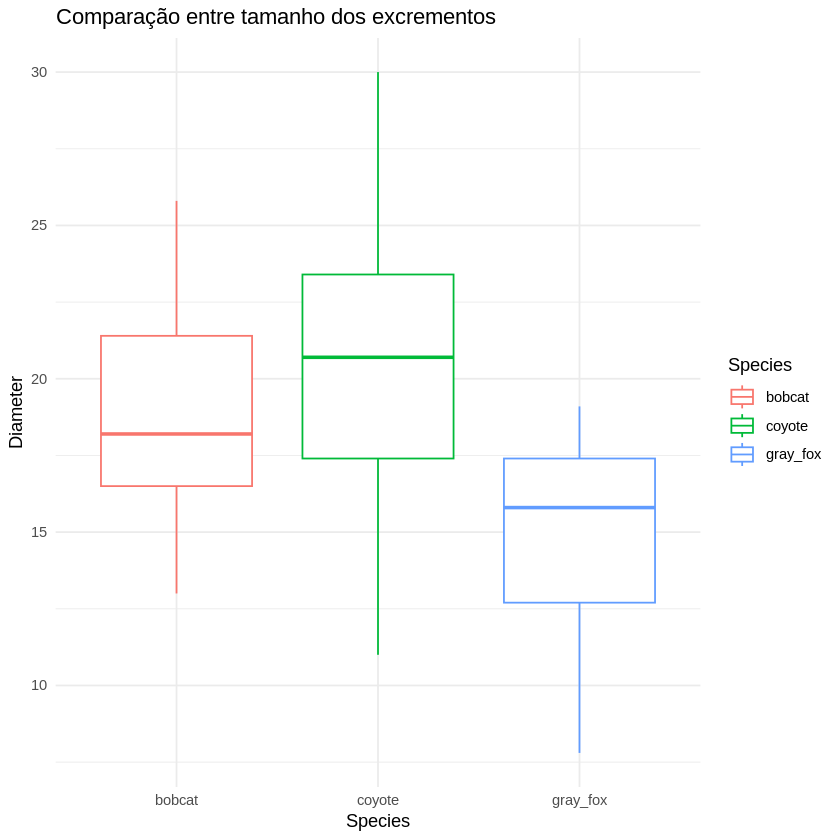

In [ ]:
library(ggplot2)
ggplot(scat, aes(x = Species, y = Diameter, color = Species)) +
  geom_boxplot() +
  ggtitle("Comparação entre tamanho dos excrementos")+
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 7 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 7 rows containing missing values or values outside the scale range
(`geom_point()`).”


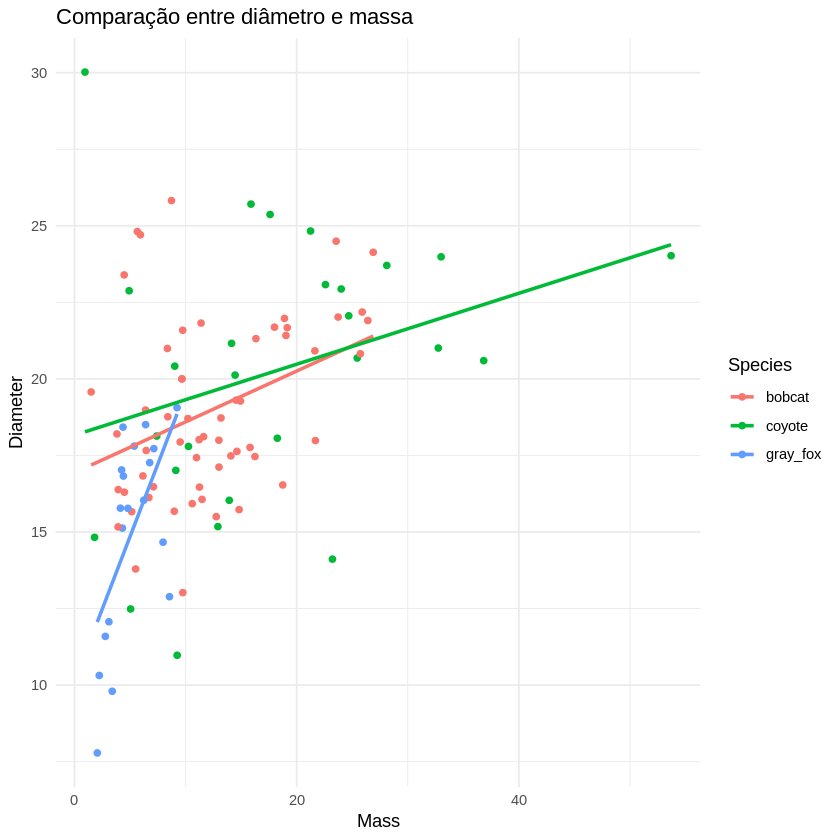

In [ ]:
ggplot(scat, aes(x = Mass, y = Diameter, color = Species)) +
  geom_jitter() +
  ggtitle("Comparação entre diâmetro e massa")+
  geom_smooth(method='lm',se=F)+
  theme_minimal()

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


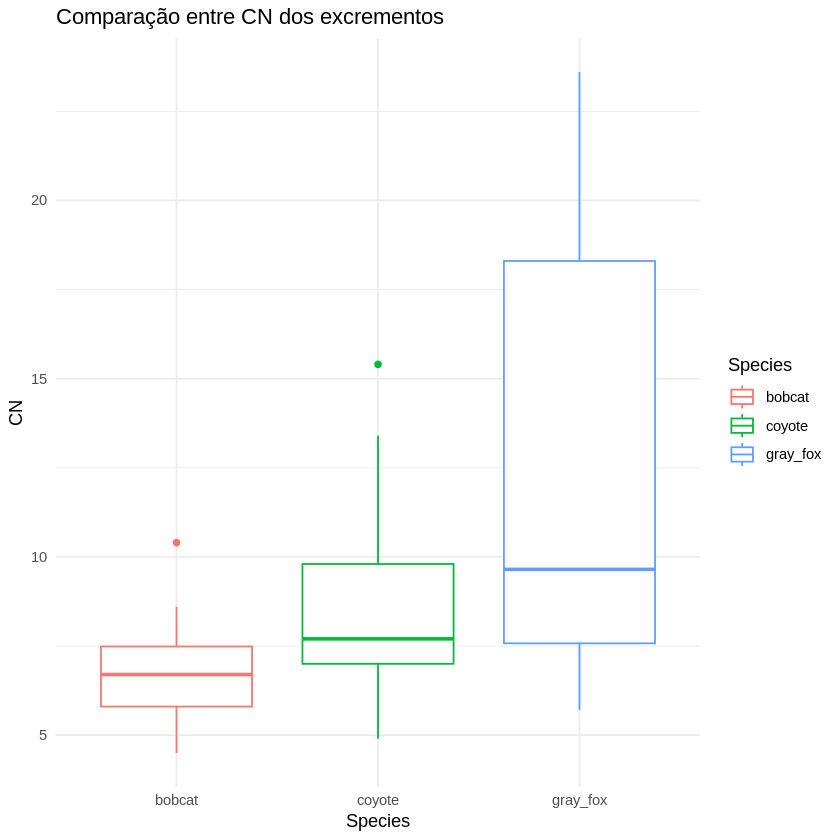

In [ ]:
ggplot(scat, aes(x = Species, y = CN, color = Species)) +
  geom_boxplot() +
  ggtitle("Comparação entre CN dos excrementos")+
  theme_minimal()

# 4. Construção do Modelo de Classificação

In [ ]:
# Criar semente para reprodutibilidade
set.seed(123)

## 4.1 Divisão entre treino e teste

**Treino** selecionar parte dos dados para treinar o modelo (geralmente 80% dos dados)

**Teste** selecionar parte dos dados para testar o model (geralmente 20% dos dados)

Existem diversas técnicas utilizadas para divisão do treino e teste, neste caso, iremos fazer uma separação aleatória. O Caret tem uma função que permite sortear aleatóriamente garantindo que haja uma igual distribuição entre as categorias.

In [ ]:
# Distibuição das categorias do dado total
library(dplyr, quietly = TRUE)

scat %>%
  group_by(Species) %>%
  summarise(
  Numero = n()
  )


Species,Numero
<fct>,<int>
bobcat,57
coyote,28
gray_fox,25


In [ ]:
# Função para sorteio
scat <- scat %>% na.omit() # remover dados faltantes
index <- createDataPartition(scat$Species, p = 0.7, list = FALSE)
dados_treino <- scat[ index, ]
dados_teste  <- scat[-index, ]

print("Treino")
dados_treino %>%
  group_by(Species) %>%
  summarise(Numero = n())

print("Teste")
dados_teste %>%
  group_by(Species) %>%
  summarise(Numero = n())

[1] "Treino"


Species,Numero
<fct>,<int>
bobcat,35
coyote,17
gray_fox,12


[1] "Teste"


Species,Numero
<fct>,<int>
bobcat,15
coyote,7
gray_fox,5


## 4.2 Treinar o modelo

In [ ]:
modelo <- train(Species ~ ., data = dados_treino, method = "rf")
modelo

Random Forest 

64 samples
18 predictors
 3 classes: 'bobcat', 'coyote', 'gray_fox' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 64, 64, 64, 64, 64, 64, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.6724854  0.3471224
  14    0.6357515  0.3471071
  26    0.6193773  0.3232299

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

## 4.3 Testar o modelo

In [ ]:
pred <- predict(modelo, newdata = dados_teste)
confusionMatrix(pred, dados_teste$Species)

Confusion Matrix and Statistics

          Reference
Prediction bobcat coyote gray_fox
  bobcat       14      2        2
  coyote        1      5        0
  gray_fox      0      0        3

Overall Statistics
                                         
               Accuracy : 0.8148         
                 95% CI : (0.6192, 0.937)
    No Information Rate : 0.5556         
    P-Value [Acc > NIR] : 0.004534       
                                         
                  Kappa : 0.6642         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: bobcat Class: coyote Class: gray_fox
Sensitivity                 0.9333        0.7143          0.6000
Specificity                 0.6667        0.9500          1.0000
Pos Pred Value              0.7778        0.8333          1.0000
Neg Pred Value              0.8889        0.9048          0.9167
Prevalence                  0.5556        0.2593          0.1852
